## DEGENSAC

- https://github.com/ducha-aiki/pydegensac
- random consensus 계열의 여러 outlier rejection & model fitting 알고리즘에 비해 좋은 성능

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pydegensac  ## pip install pydegensac

## RANSAC

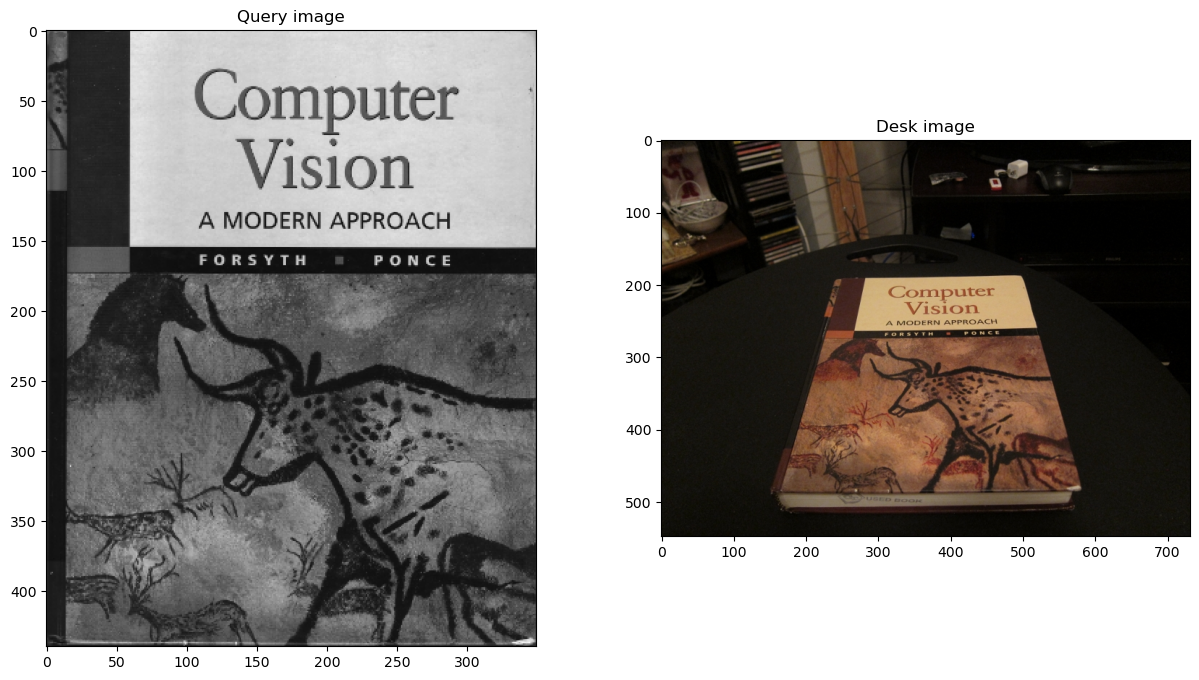

In [4]:
queryImage= './data/cv_cover.jpg'
trainImage='./data/cv_desk.png'

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.imread(queryImage), cv2.COLOR_BGR2RGB))
plt.title('Query image')
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(cv2.imread(trainImage), cv2.COLOR_BGR2RGB))
plt.title('Desk image')
plt.show()

In [5]:
img1 = cv2.imread(queryImage,cv2.IMREAD_GRAYSCALE)         
img2 = cv2.imread(trainImage,cv2.IMREAD_GRAYSCALE) 

In [6]:
# ORB
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [7]:
# BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [8]:
# Match descriptors
matches = bf.match(des1, des2)

# Sort
matches = sorted(matches, key=lambda x:x.distance)

In [9]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

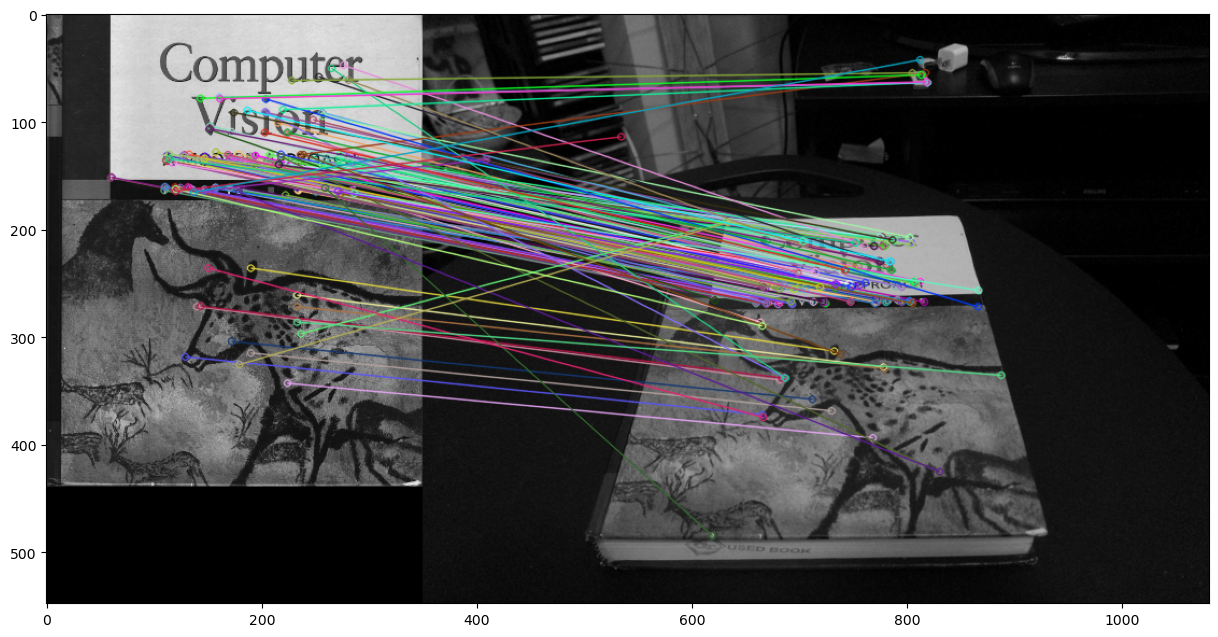

In [10]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()

## DEGENSAC

- 쉬운 예시로 살펴보자
- truncation, noise, 조도 변화, rotate, shearing 등등이 더 심하면 DEGENSAC이 더 잘 된다.

[[-1.74082317e+00  9.26805932e-01 -5.76460290e+02]
 [ 4.12089462e-02 -4.45390066e-01 -4.66866090e+02]
 [ 5.38685841e-05  2.50191065e-03 -2.40185561e+00]]
(144,) (144, 2) (144, 2)



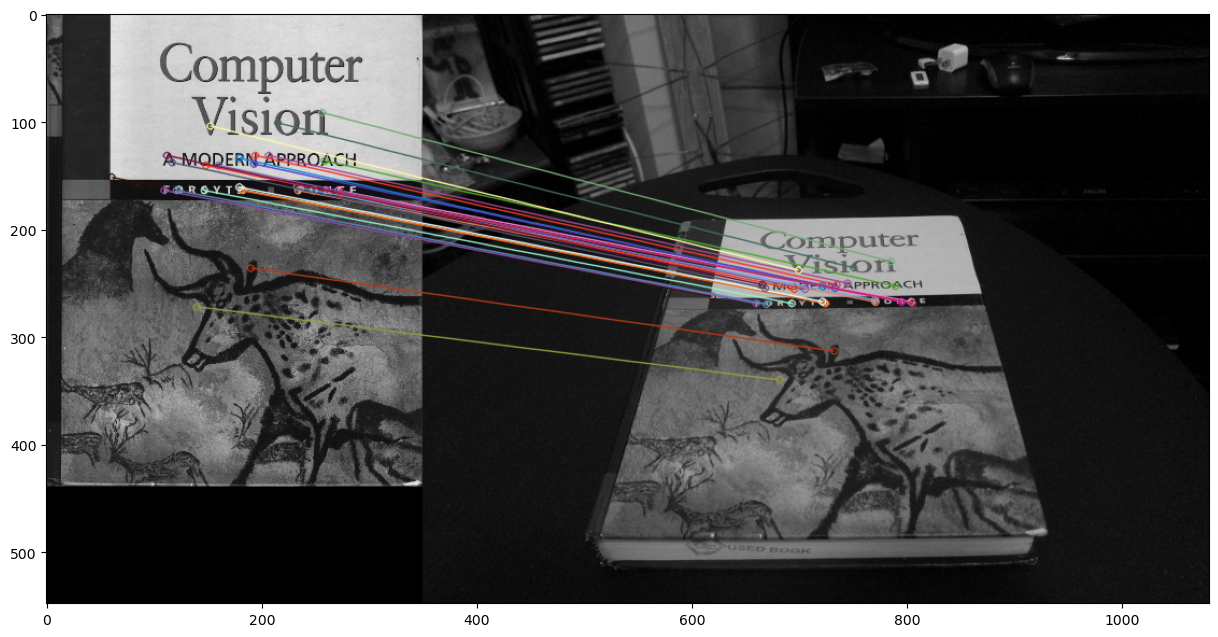

In [11]:
H, inliers = pydegensac.findHomography(np.array(points1), np.array(points2))

print(H)
print(inliers.shape, points1.shape, points2.shape)
print()
inlier_idx = np.nonzero(inliers.squeeze())
matches_degensac = np.array(matches)[inlier_idx]

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches_degensac,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(15,8))
plt.imshow(img3)
plt.show()